In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('matala2_cosmetics_2019-Nov.csv')
#df.head()

C:\Users\avigu\AppData\Local\Temp\ipykernel_3012\1321860944.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('matala2_cosmetics_2019-Nov.csv')


# 1

In [3]:
original_indexes = df.index
df['event_time'] = pd.to_datetime(df['event_time'])
df = df.sort_values(by=['user_id' , 'user_session' , 'event_time'])
df['duration_to_next_event'] = df.groupby(['user_id' , 'user_session'])['event_time'].shift(-1) - df['event_time']
df['duration_to_next_event'] = df['duration_to_next_event'].fillna(pd.Timedelta(seconds=0))
df['duration_to_next_event'] = df['duration_to_next_event'].dt.total_seconds()
#df = df.sort_values(by='event_time')
df = df.loc[original_indexes]
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0
...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0.0
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0.0
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,0.0


# 2

In [4]:
df = df.sort_values(['user_id', 'event_time'])
df['time_diff'] = df.groupby('user_id')['event_time'].diff().fillna(pd.Timedelta(seconds=0))
mask = df['time_diff'] > pd.Timedelta(days=5)
df['funnel_number'] = mask.groupby(df['user_id']).cumsum() + 1
df = df.drop(columns=['time_diff'])
df = df.loc[original_indexes]
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0,1
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0,1
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0,1
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0,1
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0.0,1
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0.0,1
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,0.0,1


# 3

In [5]:
df = df.sort_values(['user_id' , 'funnel_number' , 'event_time'])
df['index'] = df.groupby(['user_id' , 'funnel_number' , 'user_session'])['user_session'].apply(lambda x: x.shift(1) != x).astype(int)
df['index_in_funnel'] = df.groupby(['user_id' , 'funnel_number'])['index'].cumsum()
df = df.drop(['index'] , axis = 1)
df = df.loc[original_indexes]
df      

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0,1,1.0
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0,1,1.0
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0,1,1.0
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0,1,1.0
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2,1.0
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0.0,1,3.0
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0.0,1,1.0
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,0.0,1,1.0


# 4

In [6]:
pattern = re.compile(r'\d+\.?\d*')
df['price'] = df['price'].astype(str)
df['price'] = df['price'].apply(lambda x: float(pattern.search(x).group()))
df = df.loc[original_indexes]
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,23.0,1,1.0
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,15.0,1,1.0
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,45.0,1,1.0
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,103.0,1,1.0
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0.0,2,1.0
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95,0.0,1,3.0
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,31.10,572579084,d42865b7-7e04-4038-9be0-a59165625f06,0.0,1,1.0
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063,0.0,1,1.0


# 5

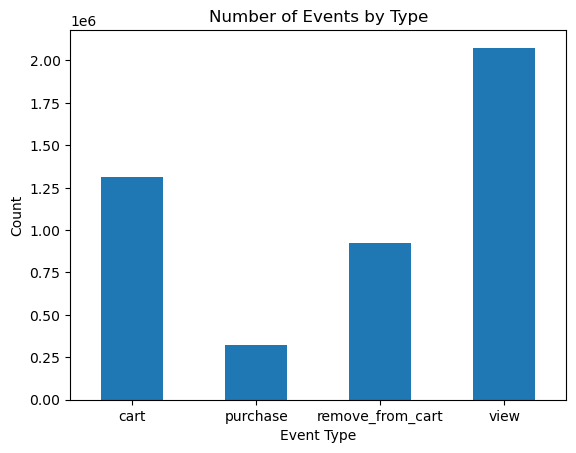

In [7]:
event_counts = df.groupby('event_type').size()
event_counts.plot(kind='bar')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Number of Events by Type')
plt.xticks(rotation=0)
plt.show()

# 6

In [8]:
new_df = df.copy(deep = True).sort_values(['user_id' , 'user_session'])

new_df['num_of_events'] = new_df.groupby(['user_id' , 'user_session'])['event_time'].transform('count')

new_df['duration'] = new_df.groupby(['user_id' , 'user_session'])['event_time'].transform('max') - new_df.groupby('user_session')['event_time'].transform('min')

new_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel,num_of_events,duration
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1.0,1.0,0 days 00:00:00
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2.0,1.0,0 days 00:00:00
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3.0,28.0,0 days 01:03:09
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3.0,28.0,0 days 01:03:09
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,28.0,1,3.0,28.0,0 days 01:03:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1,1.0,5.0,0 days 00:00:38
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1,1.0,5.0,0 days 00:00:38
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1,1.0,5.0,0 days 00:00:38
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1,1.0,1.0,0 days 00:00:00


In [9]:
temp_df = new_df.groupby(['user_id' , 'user_session' , 'event_type']).agg({'product_id': lambda x: list(set(x))}).reset_index()

pivot_df = temp_df.pivot_table(index='user_session', columns='event_type', values='product_id', aggfunc='first')
pivot_df= pivot_df.drop(['remove_from_cart'], axis=1).reset_index()
pivot_df.columns = ['user_session' , 'list_of_added_to_cart' , 'list_of_purchased' , 'list_of_viewed']

pivot_df

,user_session,list_of_added_to_cart,list_of_purchased,list_of_viewed
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,NaN,NaN,[5829298]
1,00001bc6-1e04-4861-be5d-1bc73929c21a,NaN,NaN,[5771614]
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,NaN,NaN,[5568472]
3,00004c7d-9507-474e-a559-0fdaccaaa390,NaN,NaN,[5864850]
4,0000597b-de39-4a77-9fe5-02c8792ca14e,NaN,NaN,"[5861619, 5861620, 5861591]"
...,...,...,...,...
942017,ffff5096-a5d3-4abf-b34b-9627203bb025,NaN,NaN,[5790563]
942018,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,NaN,NaN,"[5588154, 5676246]"
942019,ffff8044-2a22-4846-8a72-999e870abbe9,NaN,NaN,[5847328]
942020,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,NaN,NaN,[5528034]


In [10]:
new_df.drop_duplicates(subset='user_session', inplace=True)
new_df= new_df.drop(['event_time' , 'event_type' , 'product_id' , 'category_id' , 'category_code' , 'brand' , 'price' ,
                     'duration_to_next_event'], axis=1)
new_df

,user_id,user_session,funnel_number,index_in_funnel,num_of_events,duration
437209,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1.0,1.0,0 days 00:00:00
2494623,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2.0,1.0,0 days 00:00:00
2640971,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3.0,28.0,0 days 01:03:09
2741454,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,4.0,1.0,0 days 00:00:00
2483241,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1.0,1.0,0 days 00:00:00
...,...,...,...,...,...,...
4635578,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1.0,1.0,0 days 00:00:00
4635655,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1.0,1.0,0 days 00:00:00
4635713,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1.0,5.0,0 days 00:00:38
4635752,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1.0,1.0,0 days 00:00:00


In [11]:
new_df = pd.merge(new_df , pivot_df , on='user_session', how='right')
new_df = new_df[['user_id' , 'user_session' , 'funnel_number' , 'index_in_funnel' , 'num_of_events' , 'duration' ,
                 'list_of_viewed' , 'list_of_added_to_cart' , 'list_of_purchased']]
new_df

,user_id,user_session,funnel_number,index_in_funnel,num_of_events,duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1,1.0,1.0,0 days 00:00:00,[5829298],NaN,NaN
1,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,1,2.0,1.0,0 days 00:00:00,[5771614],NaN,NaN
2,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,1,1.0,1.0,0 days 00:00:00,[5568472],NaN,NaN
3,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,2,6.0,1.0,0 days 00:00:00,[5864850],NaN,NaN
4,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,1,2.0,3.0,0 days 00:02:31,"[5861619, 5861620, 5861591]",NaN,NaN
...,...,...,...,...,...,...,...,...,...
942017,576334415,ffff5096-a5d3-4abf-b34b-9627203bb025,1,1.0,1.0,0 days 00:00:00,[5790563],NaN,NaN
942018,577542926,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,1,1.0,2.0,0 days 00:01:14,"[5588154, 5676246]",NaN,NaN
942019,560528468,ffff8044-2a22-4846-8a72-999e870abbe9,1,4.0,1.0,0 days 00:00:00,[5847328],NaN,NaN
942020,566764549,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,1,1.0,1.0,0 days 00:00:00,[5528034],NaN,NaN
